<img src="img.png" width="200" height="150">

## Cryptocurrency Closing Price Prediction
_This is a notebook by Samson Tontoye_

### Introduction

Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model for Think-it that will predict closing price for a crypto currency coin. 

Think-it is a software engineering collective on a mission to unlock human potential through technology. We accelerate North Africa’s next generation of technical leaders — and integrate them as full-time distributed engineers with innovative teams around the world to build life-changing products.

In this notebook, we're going to go through a machine learning project with the goal of predicting the closing price of cryptocurrencies.

The data and evaluation metric we'll be using (root mean square error or RMSE) is from the [Zindi Cryptocurrency Closing Price Prediction competition.](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction)

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the closing price of a cryptocurrency given different characteristics about it.

### 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

How well can we predict the closing price of the different cryptocurrencies, given its characteristics and previous examples of closing prices over the past one year?

### 2. Data

Looking at the dataset from zindi, it's a regression problem. This means that we are trying to predict a number.

This is a comprehensive dataset that captures the prices of a cryptocurrency along with the various features including social media attributes, trading attributes and time related attributes that were noted on an hourly basis during several months and that contribute directly or indirectly to the cryptocurrency volatile prices change.

There are 2 datasets:

**Train.csv** - contains the target (contains 12632 examples with 49 different attributes, including 'close' which is the target variable).

**Test.csv** - resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to. (contains 6222 examples but missing the 'close' attribute, as this is what we'll be trying to predict).

### 3. Evaluation

For this problem, Zindi has set the evaluation metric to being root mean squared error (RMSE).

**NOTE**: As with many regression evaluations metric, the goal will be to get this value as low as possible(minimize the error).

For example, the goal for this project will be to build a machine learning model which minimizes RMSE

To see how well the model is doing, we'll calculate the RMSE and then compare the results to others on the Zindi leaderboard.

### 4. Features

Features are different parts of the data. During this step, we'll want to start finding out about the data.

One of the most common ways to do this, is to create a data dictionary.

For this dataset, Zindi provided a data dictionary which contains information about what each attribute of the dataset means.

**The Variable and their definition:**

|Features|Meaning|
| :--- | :---|
asset_id |An asset ID. We refer to all supported cryptocurrencies as assets|
open |Open price for the time period|
close |Close price for the time period|
high |Highest price of the time period|
low |Lowest price of the time period|
volume |Number of tweets|
market_cap |Total available supply multiplied by the current price in USD|
url_shares |Every time an identified relevant URL is shared within relevant social posts that contain relevant terms|
unique_url_shares|Number of unique url shares posted and collected on social media|
reddit_posts|Number of latest Reddit posts for supported coins|
reddit_posts_score|Reddit Karma score on individual posts|
reddit_comments|Comments on Reddit that contain relevant terms|
Reddit_comments_score| Reddit Karma score on comments|
tweets| Number of crypto-specific tweets based on tuned search and filtering criteria|
tweet_spam| Number of tweets classified as spam|
tweet_followers| Number of followers on selected tweets|
tweet_quotes| Number of quotes on selected tweets|
tweet_retweets| Number of retweets of selected tweets|
tweet_replies| Number of replies on selected tweets|
tweet_favorites| Number of likes on an individual social post that contains a relevant term|
tweet_sentiment1| Number of tweets which has a sentiment of “very bullish”|
tweet_sentiment2| Number of tweets which has a sentiment of “bullish”|
tweet_sentiment3| Number of tweets which has a sentiment of “neutral”|
tweet_sentiment4| Number of tweets which has a sentiment of “bearish”|
tweet_sentiment5| Number of tweets which has a sentiment of “very bearish”|
tweet_sentiment_impact1| “Very bearish” sentiment impact|
tweet_sentiment_impact2| “Bearish” sentiment impact|
tweet_sentiment_impact3| “Neutral” sentiment impact|
tweet_sentiment_impact4| “Bullish” sentiment impact|
tweet_sentiment_impact5| “Very bullish” sentiment impact|
social_score| Sum of followers, retweets, likes, reddit karma etc of social posts collected|
average_sentiment| The average score of sentiments, an indicator of the general sentiment being spread about a coin|
news| Number of news articles for supported coins|
price_score| A score we derive from a moving average that gives the coin some indication of an upward or downward based solely on the market value|
social_impact_score| A score of the volume/interaction/impact of social to give a sense of the size of the market or awareness of the coin|
correlation_rank| The algorithm that determines the correlation of our social data to the coin price/volume|
galaxy_score| An indicator of how well a coin is doing|
volatility| Volatility indicator|
market_cap_rank| The rank based on the total available supply multiplied by the current price in USD|
percent_change_24h_rank| The rank based on the percent change in price since 24 hours ago|
volume_24h_rank| The rank based on volume in the last 24 hours|
social_volume_24h_rank| The rank based on the number of social posts that contain relevant terms in the last 24 hours|
social_score_24h_rank| The rank based on the sum of followers, retweets, likes, reddit karma etc of social posts collected in the last 24 hours|
medium| Number of Medium articles for supported coins|
youtube| Number of videos with description that contains relevant terms|
social_volume| Number of social posts that contain relevant terms|
price_btc| Exchange rate with another coin|
market_cap_global| Total available supply multiplied by the current price in USD|
percent_change_24h| Percent change in price since 24 hours ago|

In [462]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules for preprocessing
from sklearn.preprocessing import LabelEncoder

# sklearn modules for ML model selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split

# Machine Learning regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
from math import sqrt 
import gc
from tqdm import tqdm
from tqdm import tqdm_notebook
%matplotlib inline

## 1. Data Overview

In [463]:
# Read the files
train = pd.read_csv('Train.csv', low_memory = False)
test = pd.read_csv('Test.csv', low_memory = False)
ss = pd.read_csv('SampleSubmission.csv', low_memory = False)

In [464]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(train.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [465]:
dataoverview(train, "Overview of the train dataset")

Overview of the train dataset:

Rows: 12632

Number of features: 49

Features:
['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap', 'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score', 'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies', 'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5', 'tweet_sentiment_impact1', 'tweet_sentiment_impact2', 'tweet_sentiment_impact3', 'tweet_sentiment_impact4', 'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news', 'price_score', 'social_impact_score', 'correlation_rank', 'galaxy_score', 'volatility', 'market_cap_rank', 'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank', 'social_score_24h_rank', 'medium', 'youtube', 'social_volume', 'percent_change_24h', 'market_cap_global', 'close']

Missing values: 183258

Unique values:
id         

In [466]:
dataoverview(test, 'Overview of the test dataset')

Overview of the test dataset:

Rows: 6222

Number of features: 48

Features:
['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap', 'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score', 'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies', 'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5', 'tweet_sentiment_impact1', 'tweet_sentiment_impact2', 'tweet_sentiment_impact3', 'tweet_sentiment_impact4', 'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news', 'price_score', 'social_impact_score', 'correlation_rank', 'galaxy_score', 'volatility', 'market_cap_rank', 'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank', 'social_score_24h_rank', 'medium', 'youtube', 'social_volume', 'percent_change_24h', 'market_cap_global', 'close']

Missing values: 85809

Unique values:
id            

## 2. Exploratory Data Analysis

In [467]:
# Preview Train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [468]:
# Preview Test
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [469]:
# Check the shape of the train dataset
train.shape

(12632, 49)

In [470]:
# Check the shape of the test dataset
test.shape

(6222, 48)

In [471]:
# check the sample submission
ss.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


In [472]:
# No parse_dates... check dtype of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [473]:
# Check for missing null values
train.isna().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

In [474]:
# Check for percentage of missing null values
train.isna().sum() *100/len(train)

id                          0.000000
asset_id                    0.000000
open                       31.784357
high                       31.784357
low                        31.784357
volume                     31.879354
market_cap                 33.668461
url_shares                 32.116846
unique_url_shares          32.116846
reddit_posts                1.907853
reddit_posts_score          1.907853
reddit_comments             1.820773
reddit_comments_score       1.820773
tweets                     32.045598
tweet_spam                 32.045598
tweet_followers            32.124763
tweet_quotes               32.124763
tweet_retweets             32.124763
tweet_replies              32.124763
tweet_favorites            32.124763
tweet_sentiment1           32.045598
tweet_sentiment2           32.045598
tweet_sentiment3           32.045598
tweet_sentiment4           32.045598
tweet_sentiment5           32.045598
tweet_sentiment_impact1    32.045598
tweet_sentiment_impact2    32.045598
t

### Visualize the missing values

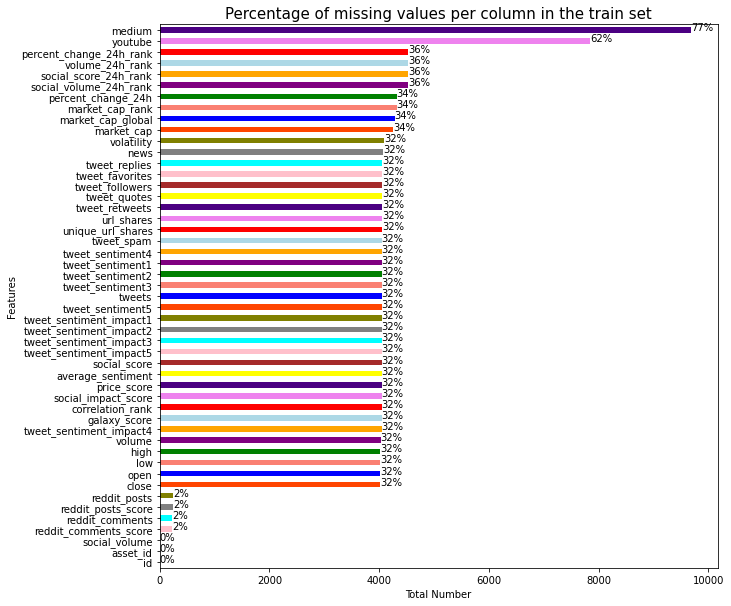

In [475]:
# Visualize the missing values in the train dataset
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 10),
                                           color = ['indigo', 'yellow', 'brown', 'pink',
                                                 'cyan', 'gray', 'olive', 'orangered',
                                                 'blue', 'salmon', 'green', 'purple',
                                                 'orange', 'lightblue', 'red', 'violet'])

# Add some attributes
plt.title('Percentage of missing values per column in the train set', fontdict={'size':15})
plt.xlabel('Total Number')
plt.ylabel('Features')

for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/train.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));

In [476]:
# The .describe() function will demonstrate the count, mean, std dev, min, max, etc values for the 
# Numerical features present in the  train dataset.
train.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,12632.0,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,1.0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,...,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,0.0,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,...,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,1.0,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,...,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,1.0,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,...,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,1.0,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,...,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,1.0,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.500000,893.000000,50.000000,328.000000,...,970.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5178.000000,1.867715,3.788975e+11,13066.731701
max,1.0,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.000000,...,1490.000000,10.000000,2.000000,2.000000,12.000000,178.000000,140431.000000,34.932303,2.062215e+12,61259.670876


In [477]:
# Check for missing values in test data
test.isna().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

In [478]:
# Check for percentage of missing null values
test.isna().sum() * 100/len(test)

id                          0.000000
asset_id                    0.000000
open                       30.826101
high                       30.826101
low                        30.826101
volume                     30.858245
market_cap                 32.642237
url_shares                 31.131469
unique_url_shares          31.131469
reddit_posts                1.607200
reddit_posts_score          1.607200
reddit_comments             1.816136
reddit_comments_score       1.816136
tweets                     31.067181
tweet_spam                 31.067181
tweet_followers            31.099325
tweet_quotes               31.099325
tweet_retweets             31.099325
tweet_replies              31.099325
tweet_favorites            31.099325
tweet_sentiment1           31.067181
tweet_sentiment2           31.067181
tweet_sentiment3           31.067181
tweet_sentiment4           31.067181
tweet_sentiment5           31.067181
tweet_sentiment_impact1    31.067181
tweet_sentiment_impact2    31.067181
t

In [479]:
# The .describe() function will demonstrate the count, mean, std dev, min, max, etc values for the 
# Numerical features present in the  train dataset.
test.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
count,6222.0,4304.000000,4304.000000,4304.000000,4.302000e+03,4.191000e+03,4285.000000,4285.000000,6122.000000,6122.000000,...,4168.000000,4064.000000,4064.000000,4064.000000,4064.000000,1451.000000,2337.000000,6222.000000,4151.000000,4.180000e+03
mean,1.0,15054.297624,15103.810538,14999.713795,1.290371e+09,2.743587e+11,1238.791832,753.067678,35.728520,327.871774,...,1.000720,811.893701,2.125000,1.015010,1.005413,1.354928,3.414206,3896.704275,0.314752,4.477426e+11
std,0.0,13832.427474,13911.601934,13744.393441,1.928771e+09,2.612154e+11,604.437791,316.087029,30.300927,867.006409,...,0.026822,220.406920,0.464465,0.121607,0.073385,0.905238,6.521994,4859.988807,3.645685,4.501363e+11
min,1.0,4910.805430,4981.827827,4794.964538,2.848978e+08,8.862308e+10,1.000000,1.000000,1.000000,0.000000,...,1.000000,158.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-38.296128,1.386712e+11
25%,1.0,8328.747189,8346.180632,8308.561180,6.161449e+08,1.489114e+11,845.000000,553.000000,13.000000,78.000000,...,1.000000,668.000000,2.000000,1.000000,1.000000,1.000000,1.000000,253.250000,-1.259532,2.244002e+11
50%,1.0,9592.641478,9602.395750,9569.265556,9.376669e+08,1.746268e+11,1123.000000,699.000000,28.000000,153.000000,...,1.000000,827.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3360.500000,0.218129,2.704375e+11
75%,1.0,11880.104999,11890.085273,11868.134788,1.525557e+09,2.168739e+11,1488.000000,874.000000,49.000000,322.000000,...,1.000000,964.250000,2.000000,1.000000,1.000000,1.000000,4.000000,5100.000000,1.780624,3.718909e+11
max,1.0,61158.881991,61568.793988,60732.518436,5.830593e+10,1.576560e+12,8852.000000,5071.000000,215.000000,43760.000000,...,2.000000,1480.000000,11.000000,2.000000,2.000000,12.000000,126.000000,138363.000000,28.375739,2.059298e+12


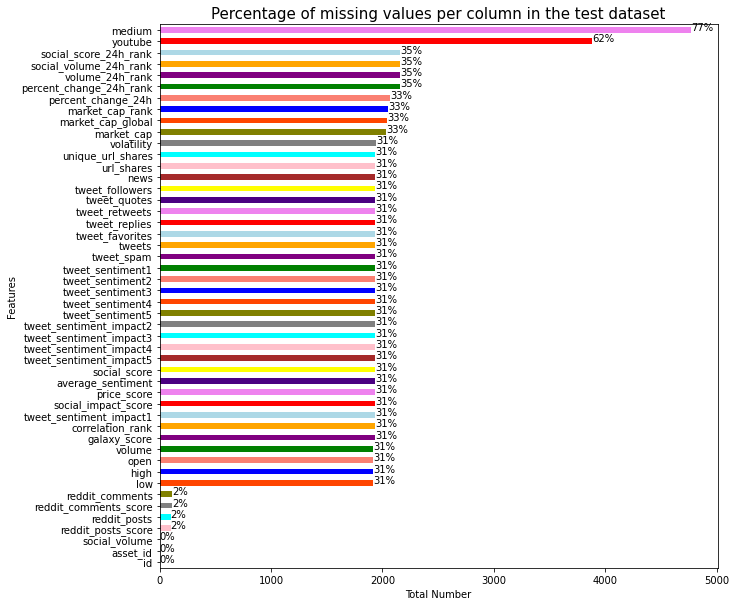

In [480]:
# visualize the missing values in the test dataset
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 10),
                                          color = ['indigo', 'yellow', 'brown', 'pink',
                                                 'cyan', 'gray', 'olive', 'orangered',
                                                 'blue', 'salmon', 'green', 'purple',
                                                 'orange', 'lightblue', 'red', 'violet'])

# Add some attributes
plt.title('Percentage of missing values per column in the test dataset', fontdict={'size':15})
plt.xlabel('Total Number')
plt.ylabel('Features')

for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/test.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));

Similar distribution of null values btw train and test

*Do the same users repeat in the train set?*

In [481]:
train['id'].value_counts().max()

1

*Do the same users repeat in the train and test set?*

In [482]:
set(train['id'].unique()).intersection(set(test['id'].unique()))

set()

**Since over 60% of the values in medium and youtube columns in the train dataset are missing, we will drop the columns:**

In [483]:
# Drop youtube and medium column from the train dataset
train2 = train.drop(['medium', 'youtube'], axis = 1)
train2.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,0.007118,1.0,606.0,2.0,1.0,1.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,0.009419,1.0,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,0.013530,1.0,692.0,3.0,1.0,1.0,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,0.010332,1.0,749.0,2.0,1.0,1.0,3996,2.609576,3.386925e+11,10384.798216


In [484]:
# Drop youtube and medium column from the test dataset
test2 = test.drop(['medium', 'youtube'], axis = 1)
test2.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [485]:
train2.shape, test2.shape

((12632, 47), (6222, 46))

**Checking for categorical features:**

In [486]:
# Categorical features in the train dataset
categorical_feats = train2.dtypes[train2.dtypes == 'object'].index
categorical_feats

Index(['id'], dtype='object')

In [487]:
# Categorical features in the test dataset
categorical_feats = test2.dtypes[test2.dtypes == 'object'].index
categorical_feats

Index(['id'], dtype='object')

**Checking for numerical features:**

In [488]:
numerical_feats = train2.dtypes[train2.dtypes != 'object'].index
numerical_feats

Index(['asset_id', 'open', 'high', 'low', 'volume', 'market_cap', 'url_shares',
       'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'social_volume', 'percent_change_24h',
       'market_cap_global', 'close'],
      dtype='object')

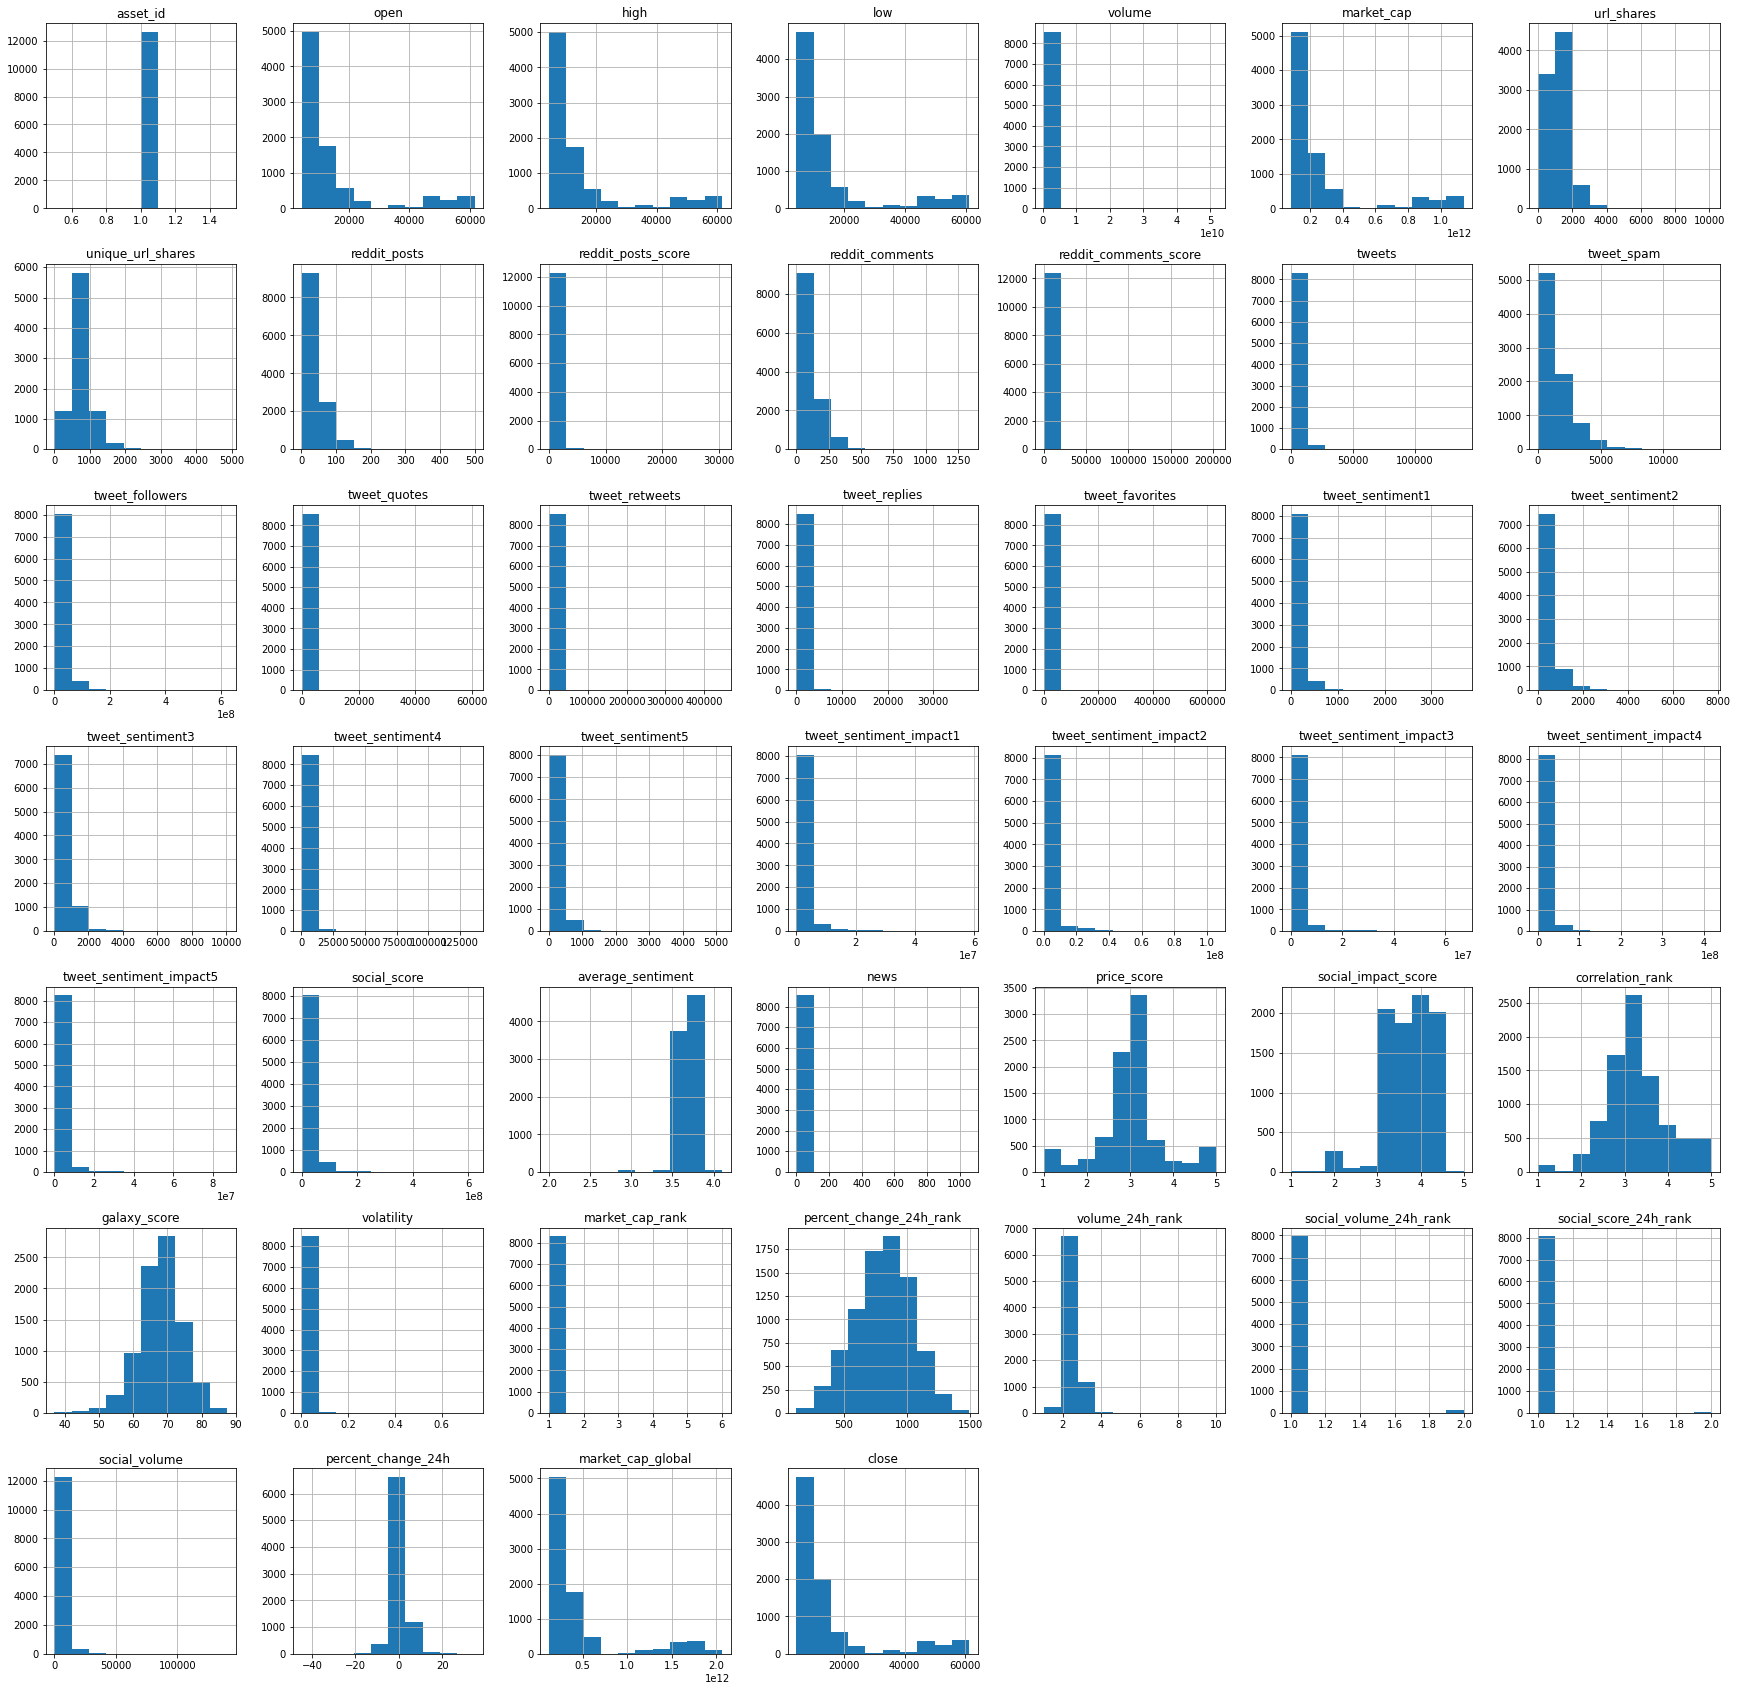

Wall time: 11.1 s


In [489]:
%%time

train2.hist(figsize=(30,30))
plt.show()

In [490]:
numerical_feats = test2.dtypes[test2.dtypes != 'object'].index
numerical_feats

Index(['asset_id', 'open', 'high', 'low', 'volume', 'market_cap', 'url_shares',
       'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'social_volume', 'percent_change_24h',
       'market_cap_global'],
      dtype='object')

In [491]:
# Drop the asset_id column since it has just 1 variable
train2 = train2.drop(['asset_id'], axis=1)
test2 = test2.drop(['asset_id'], axis=1)

In [492]:
train2 = train2[['id', 'open', 'high', 'low', 'market_cap', \
                 'market_cap_global', 'close']]   

test2 = test2[['id', 'open', 'high', 'low', 'market_cap', \
               'market_cap_global']]   

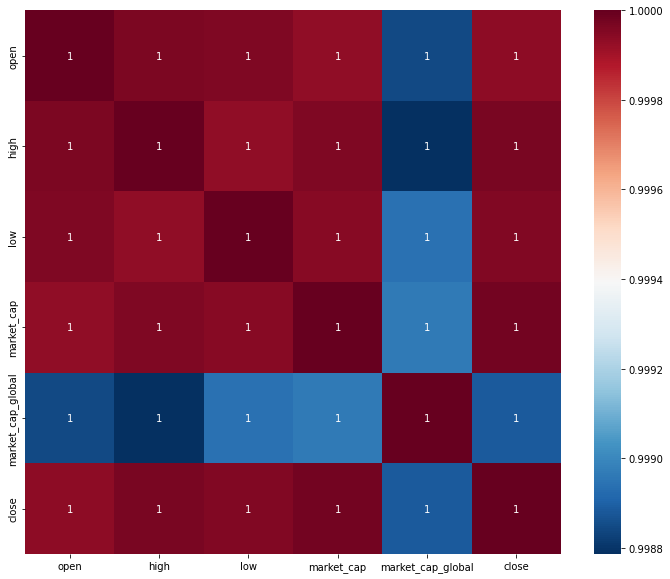

In [493]:
corrs = train2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

According to the correlation matrix, the columns 'id', 'open', 'high', 'low', 'market_cap', 'market_cap_global',  'close' are all correlated

In [494]:
# Check for duplicated values in the train dataset
train2.duplicated().sum()

0

In [495]:
# Check for duplicate values in the test dataset
test2.duplicated().sum()

0

## 3. Feature Engineering

**Aggregate the selected features:**

In [496]:
# Convert features from string to list of values
def replace_nan(x):
    if x=='nan':
        return np.nan
    else:
        return float(x)
features=['open', 'high', 'low', 'market_cap_global', 'market_cap']

In [497]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [498]:
def aggregate_features(x, col_name):
    x['max_'+ col_name] = x[col_name].apply(np.max)
    x['mean_'+ col_name]= x[col_name].apply(np.mean)
    x['median_' + col_name] = x[col_name].apply(np.median)
    return x
def remove_nan_values(x):
    return [e for e in x if not math.isnan(e)]

In [499]:
for col_name in tqdm(features):
    train2 = aggregate_features(train2, col_name)
    test2 = aggregate_features(test2, col_name)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.11s/it]


In [500]:
train2.shape, test2.shape

((12632, 22), (6222, 21))

In [501]:
train2.head()

,id,open,high,low,market_cap,market_cap_global,close,max_open,mean_open,median_open,...,median_high,max_low,mean_low,median_low,max_market_cap_global,mean_market_cap_global,median_market_cap_global,max_market_cap,mean_market_cap,median_market_cap
0,ID_322qz6,9422.849081,9428.490628,9422.849081,1.737635e+11,2.818066e+11,9428.279323,9422.849081,9422.849081,9422.849081,...,9428.490628,9422.849081,9422.849081,9422.849081,2.818066e+11,2.818066e+11,2.818066e+11,1.737635e+11,1.737635e+11,1.737635e+11
1,ID_3239o9,7985.359278,7992.059917,7967.567267,1.426942e+11,2.126897e+11,7967.567267,7985.359278,7985.359278,7985.359278,...,7992.059917,7967.567267,7967.567267,7967.567267,2.126897e+11,2.126897e+11,2.126897e+11,1.426942e+11,1.426942e+11,1.426942e+11
2,ID_323J9k,49202.033778,49394.593518,49068.057046,9.166977e+11,1.530712e+12,49120.738484,49202.033778,49202.033778,49202.033778,...,49394.593518,49068.057046,49068.057046,49068.057046,1.530712e+12,1.530712e+12,1.530712e+12,9.166977e+11,9.166977e+11,9.166977e+11
3,ID_323y5P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.921183e+11,3.386925e+11,10384.798216,10535.737119,10535.737119,10535.737119,...,10535.737119,10384.798216,10384.798216,10384.798216,3.386925e+11,3.386925e+11,3.386925e+11,1.921183e+11,1.921183e+11,1.921183e+11


In [502]:
test2.head()

,id,open,high,low,market_cap,market_cap_global,max_open,mean_open,median_open,max_high,...,median_high,max_low,mean_low,median_low,max_market_cap_global,mean_market_cap_global,median_market_cap_global,max_market_cap,mean_market_cap,median_market_cap
0,ID_323Sn2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_325SNW,11335.062188,11351.690956,11335.062188,2.101463e+11,3.631052e+11,11335.062188,11335.062188,11335.062188,11351.690956,...,11351.690956,11335.062188,11335.062188,11335.062188,3.631052e+11,3.631052e+11,3.631052e+11,2.101463e+11,2.101463e+11,2.101463e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.153862e+11,1.771075e+11,6322.560756,6322.560756,6322.560756,6328.362354,...,6328.362354,6294.714484,6294.714484,6294.714484,1.771075e+11,1.771075e+11,1.771075e+11,1.153862e+11,1.153862e+11,1.153862e+11
3,ID_328qCx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_3293uJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Concatenating train and test data for easy preprocessing:**

In [503]:
# combine train and test set
length = len(train2)
all_data = pd.concat([train2, test2])

print(f'The shape of the combined dataframe is:{all_data.shape}')
print(train2.shape, test2.shape, all_data.shape)

The shape of the combined dataframe is:(18854, 22)
(12632, 22) (6222, 21) (18854, 22)


In [504]:
all_data.head()

,id,open,high,low,market_cap,market_cap_global,close,max_open,mean_open,median_open,...,median_high,max_low,mean_low,median_low,max_market_cap_global,mean_market_cap_global,median_market_cap_global,max_market_cap,mean_market_cap,median_market_cap
0,ID_322qz6,9422.849081,9428.490628,9422.849081,1.737635e+11,2.818066e+11,9428.279323,9422.849081,9422.849081,9422.849081,...,9428.490628,9422.849081,9422.849081,9422.849081,2.818066e+11,2.818066e+11,2.818066e+11,1.737635e+11,1.737635e+11,1.737635e+11
1,ID_3239o9,7985.359278,7992.059917,7967.567267,1.426942e+11,2.126897e+11,7967.567267,7985.359278,7985.359278,7985.359278,...,7992.059917,7967.567267,7967.567267,7967.567267,2.126897e+11,2.126897e+11,2.126897e+11,1.426942e+11,1.426942e+11,1.426942e+11
2,ID_323J9k,49202.033778,49394.593518,49068.057046,9.166977e+11,1.530712e+12,49120.738484,49202.033778,49202.033778,49202.033778,...,49394.593518,49068.057046,49068.057046,49068.057046,1.530712e+12,1.530712e+12,1.530712e+12,9.166977e+11,9.166977e+11,9.166977e+11
3,ID_323y5P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.921183e+11,3.386925e+11,10384.798216,10535.737119,10535.737119,10535.737119,...,10535.737119,10384.798216,10384.798216,10384.798216,3.386925e+11,3.386925e+11,3.386925e+11,1.921183e+11,1.921183e+11,1.921183e+11


**Applying Groupby of the most important feature:**

It's observed from the first running of the codes, the column "high" seemed to add a lot of importance to my model. Henceforth, grouping any other column based on "high" will or might add more value to the cross validation mean accuracy. So therefore, I decided to group all columns based on "high".

In [505]:
ctr = all_data.groupby('high').mean()
ctr.drop('close', 1, inplace = True)
cols = []

for i in ctr.columns:
    if i != 'high':
        ctr[i + '_high_mean_all'] = ctr[i]
        ctr.drop(i, 1, inplace = True)
        cols.append(i + '_high_mean_all')
        
all_data= pd.merge(all_data, ctr, on='high', how = 'left')
for col in cols: all_data[col + '_freq'] = all_data[col].map(all_data[col].value_counts().to_dict())/len(all_data)

**Let's split the combined data back into train and test datasets:**

In [506]:
train_df = all_data[:length]

test_df = all_data[length:]

test_df.drop('close', axis = 1, inplace = True)

In [507]:
train_df.head()

,id,open,high,low,market_cap,market_cap_global,close,max_open,mean_open,median_open,...,median_high_high_mean_all_freq,max_low_high_mean_all_freq,mean_low_high_mean_all_freq,median_low_high_mean_all_freq,max_market_cap_global_high_mean_all_freq,mean_market_cap_global_high_mean_all_freq,median_market_cap_global_high_mean_all_freq,max_market_cap_high_mean_all_freq,mean_market_cap_high_mean_all_freq,median_market_cap_high_mean_all_freq
0,ID_322qz6,9422.849081,9428.490628,9422.849081,1.737635e+11,2.818066e+11,9428.279323,9422.849081,9422.849081,9422.849081,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
1,ID_3239o9,7985.359278,7992.059917,7967.567267,1.426942e+11,2.126897e+11,7967.567267,7985.359278,7985.359278,7985.359278,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
2,ID_323J9k,49202.033778,49394.593518,49068.057046,9.166977e+11,1.530712e+12,49120.738484,49202.033778,49202.033778,49202.033778,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
3,ID_323y5P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.921183e+11,3.386925e+11,10384.798216,10535.737119,10535.737119,10535.737119,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053


In [508]:
test_df.head()

,id,open,high,low,market_cap,market_cap_global,max_open,mean_open,median_open,max_high,...,median_high_high_mean_all_freq,max_low_high_mean_all_freq,mean_low_high_mean_all_freq,median_low_high_mean_all_freq,max_market_cap_global_high_mean_all_freq,mean_market_cap_global_high_mean_all_freq,median_market_cap_global_high_mean_all_freq,max_market_cap_high_mean_all_freq,mean_market_cap_high_mean_all_freq,median_market_cap_high_mean_all_freq
12632,ID_323Sn2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12633,ID_325SNW,11335.062188,11351.690956,11335.062188,2.101463e+11,3.631052e+11,11335.062188,11335.062188,11335.062188,11351.690956,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
12634,ID_325uzE,6322.560756,6328.362354,6294.714484,1.153862e+11,1.771075e+11,6322.560756,6322.560756,6322.560756,6328.362354,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
12635,ID_328qCx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12636,ID_3293uJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
train_df.shape, test_df.shape

((12632, 60), (6222, 59))

In [510]:
# Check missing data
train_df.isnull().sum()/len(train_df)

id                                             0.000000
open                                           0.317844
high                                           0.317844
low                                            0.317844
market_cap                                     0.336685
market_cap_global                              0.338901
close                                          0.317844
max_open                                       0.317844
mean_open                                      0.317844
median_open                                    0.317844
max_high                                       0.317844
mean_high                                      0.317844
median_high                                    0.317844
max_low                                        0.317844
mean_low                                       0.317844
median_low                                     0.317844
max_market_cap_global                          0.338901
mean_market_cap_global                         0

In [511]:
# Check missing data
test_df.isnull().sum()/len(test_df)

id                                             0.000000
open                                           0.308261
high                                           0.308261
low                                            0.308261
market_cap                                     0.326422
market_cap_global                              0.328190
max_open                                       0.308261
mean_open                                      0.308261
median_open                                    0.308261
max_high                                       0.308261
mean_high                                      0.308261
median_high                                    0.308261
max_low                                        0.308261
mean_low                                       0.308261
median_low                                     0.308261
max_market_cap_global                          0.328190
mean_market_cap_global                         0.328190
median_market_cap_global                       0

In [512]:
# Fill the missing values in the train and test dataset
train_df = train_df.fillna(value=-1)
test_df = test_df.fillna(value=-1)

In [513]:
train = train_df
test = test_df

In [514]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [515]:
# Select the main columns to be used in training
main_cols = train.columns.difference(['id', 'close'])

X = train[main_cols]
y = train.close.astype(float)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

## 4. Modelling

### (1.) Ridge Regression: (55.976 on the leaderboard)

Creating the model

In [516]:
# Training the model
ridge = Ridge(normalize=False)
ridge.fit(X_train, y_train)

# Making predictions
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the ridge model
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Ridge: 69.22885375294305


#### Hyperparameter tuning to find the optimal parameters for the model:

In [517]:
# Tuning the alpha parameter
# Creating a parameters dictionary

params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a 10 folds cross validation
kfold = KFold(n_splits = 5)

# Using gridsearch to find the optimal parameters
grid_search = GridSearchCV(estimator=Ridge(normalize = False), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the best score
print(f'Best score is {grid_search.best_score_*-1} and the best parameters are {grid_search.best_params_}')

Best score is 3379.5155293141943 and the best parameters are {'alpha': 10.0}


**Training the model with optimal parameters:**

In [518]:
# Training the model with the optimal alpha value
ridge = Ridge(normalize=False, alpha = 10)
ridge.fit(X_train, y_train)

# Making predictions
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Ridge: 69.24112136554412


**Using ridge to make predictions:**

In [519]:
test_pred = ridge.predict(test[main_cols])
sub_file = ss.copy()
sub_file['close'] = test_pred
sub_file['close'] = np.where(sub_file['close'].values<0, 'NaN', sub_file['close'].values)
sub_file.to_csv('Sub_ridge-model.csv', index=False) # 55.976 on the leaderboard
sub_file.head()

,id,close
0,ID_323Sn2,NaN
1,ID_325SNW,11350.99272205658
2,ID_325uzE,6308.049656073675
3,ID_328qCx,NaN
4,ID_3293uJ,NaN


**Performing cross validation to check for overfitting or underfitting:**

In [520]:
# Performing cross validation of ten folds
scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the standard deviation of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 3391.033
Standard deviation of the cross validation scores is 1788.87


### (2.) Lasso Regresion:  (84.691 on the Leaderboard)
Creating the model

In [521]:
# Training the model
lasso = Lasso(normalize=False)
lasso.fit(X_train, y_train)

# Making predictions
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Lasso: 78.95823256305496


**Hyperparameter tuning to find the optimal parameters for the model:**

In [522]:
# Tuning the alpha parameter
# Creating a parameters dictionary

params = {'alpha': np.logspace(-6, 2, 8)}

# Creating a 10 folds cross validation
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=Lasso(normalize=False), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search
grid_search_results = grid_search.fit(X, y)

# Displaying the best paramaters and the best score
print(f'Best score is {grid_search.best_score_*-1} and the best parameters are {grid_search.best_params_}')

Best score is 6091.203760225582 and the best parameters are {'alpha': 0.03727593720314938}


**Training the model with optimal parameters:**

In [523]:
# Training the model with the optimal alpha value
lasso = Lasso(normalize=False, alpha = 0.03727593720314938)
lasso.fit(X_train, y_train)

# Making predictions
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Lasso: 78.75994455898024


**Performing cross validation to check for overfitting or underfitting:**

In [524]:
# Performing cross validation of ten folds
scores = cross_val_score(lasso, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross vaidation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the standard deviation of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross vaidation scores is 6091.204
Standard deviation of the cross validation scores is 1807.183


**Using Lasso to make predictions:**

In [525]:
test_pred = lasso.predict(test[main_cols])
sub_file = ss.copy()
sub_file['close'] = test_pred
sub_file['close'] = np.where(sub_file['close'].values<0,"NaN",sub_file['close'].values)            
sub_file.to_csv('Sub_lasso-model.csv', index=False)   #  84.691 on the Leaderboard
sub_file.head()

,id,close
0,ID_323Sn2,NaN
1,ID_325SNW,11351.325951494873
2,ID_325uzE,6327.589190114097
3,ID_328qCx,NaN
4,ID_3293uJ,NaN


### (3.) Elastic Net:  (84.5247 on the Leaderboard)
Creating the model


In [526]:
# Training the model
elastic = ElasticNet(normalize=False)
elastic.fit(X_train, y_train)

# Making predictions
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of ElasticNet: 85.42632610218445


**Hyperparameter tuning to find the optimal parameters for the model:**


In [527]:
# Tuning the alpha parameter
# Creating a parameters dictionary
params = {'alpha': np.logspace(-5, 2, 8),
         'l1_ratio':[.2,.4,.6,.8]}

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=ElasticNet(normalize = False), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_*-1} and the best parameters are {grid_search.best_params_}')

Best score is 6071.976587755606 and the best parameters are {'alpha': 0.01, 'l1_ratio': 0.8}


**Training the model with optimal parameters:**

In [528]:
# Training the model with the optimal alpha value
elastic = ElasticNet(normalize=False, alpha = 0.01, l1_ratio = 0.8)
elastic.fit(X_train, y_train)

# Making predictions
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of ElasticNet: 78.68727048007844


**Performing cross validation to check for overfitting or underfitting:**

In [529]:
# Performing cross validation of ten folds
scores = cross_val_score(elastic, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 6071.977
Standard deviation of the cross validation scores is 1811.882


**Using ElasticNet to make predictions:**

In [530]:
test_pred = elastic.predict(test[main_cols])
sub_file = ss.copy()
sub_file['close'] = test_pred 
sub_file['close'] = np.where(sub_file['close'].values<0,"NaN",sub_file['close'].values)           
sub_file.to_csv('Sub_elastic-model.csv', index=False)   # 84.5247 on the Leaderboard
sub_file.head()

,id,close
0,ID_323Sn2,NaN
1,ID_325SNW,11350.014025309933
2,ID_325uzE,6327.381640791121
3,ID_328qCx,NaN
4,ID_3293uJ,NaN


### (4.) RandomForestRegressor:   (54.334 on the Leaderboard)
Creating the model

In [531]:
# Using RandomForestRegressor to make predictions
rfr = RandomForestRegressor(n_estimators= 500) 

rfr.fit(X_train, y_train)

# Making predictions
y_pred = rfr.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of RandomForestRegressor: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of RandomForestRegressor: 62.24962586063053


**Using RandomForestRegressor to make predictions:**

In [532]:
test_pred = rfr.predict(test[main_cols])
sub_file = ss.copy()
sub_file['close'] = test_pred
sub_file['close'] = np.where(sub_file['close'].values<0,"NaN",sub_file['close'].values)           
sub_file.to_csv('Sub_RFR_model.csv', index=False)          # 54.334 on Leaderboard
sub_file.head()

,id,close
0,ID_323Sn2,NaN
1,ID_325SNW,11346.508588999972
2,ID_325uzE,6312.1639855880185
3,ID_328qCx,NaN
4,ID_3293uJ,NaN


### (5) DecisionTreeRegressor:  (69.222 on LB)

In [533]:
# Using DecisionTreeRegressor to make predictions
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Making predictions
y_pred = dtr.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of DecisionTreeRegressor: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of DecisionTreeRegressor: 103.49910715905715


**Using DecisionTreeRegressor to make predictions:**

In [534]:
test_pred = dtr.predict(test[main_cols])
sub_file = ss.copy()
sub_file['close'] = test_pred
sub_file['close'] = np.where(sub_file['close'].values<0,"NaN",sub_file['close'].values)           
sub_file.to_csv('Sub_DTR_model.csv', index=False)          # 69.222 on LB
sub_file.head()

,id,close
0,ID_323Sn2,NaN
1,ID_325SNW,11344.767321
2,ID_325uzE,6320.31294
3,ID_328qCx,NaN
4,ID_3293uJ,NaN


### (6.) XGBRegressor (with GridsearchCV): (53.014 on the Leaderboard)

In [535]:
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [536]:
def evaluate(model, test_features, test_labels):
    
    from sklearn.metrics import mean_squared_error
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels , predictions))
    print('Model Performance')
    print('rmse = {:0.4f}.'.format(rmse))

In [537]:
%%time
xgb_model = XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.025],  # So called `eta` value
              'max_depth': [13,14],
              'min_child_weight': [4,5],
              'subsample': [0.8,0.9],
              'colsample_bytree': [0.6,0.7],
              'n_estimators': [400,500],
              'nthread': [4]}

xgb_grid = GridSearchCV(xgb_model,parameters,cv =5,verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X,y)

print(xgb_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.025, 'max_depth': 13, 'min_child_weight': 5, 'n_estimators': 400, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.9}
Wall time: 1h 28min 17s


In [538]:
%%time
param= {'colsample_bytree': 0.7, 'learning_rate': 0.025, 'max_depth': 13,
        'min_child_weight': 5, 'n_estimators': 400, 'nthread': 4,
        'objective': 'reg:squarederror', 'subsample': 0.9}
xgb_other = XGBRegressor(**param)

xgb_other.fit(X,y)

# Making predictions
y_pred = xgb_other.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of XGBoostRegressor: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of XGBoostRegressor: 18.724680606874568
Wall time: 46.3 s


In [539]:
# Make predictions in test set and prepare submission file
test_pred = xgb_other.predict(test[main_cols])
sub_file = ss.copy()
sub_file['close'] = test_pred
sub_file['close'] = np.where(sub_file['close'].values<0,"NaN",sub_file['close'].values)
sub_file.to_csv('xgb.csv', index = False)   # 53.014 on the Leaderboard

In [540]:
sub_file.head()

,id,close
0,ID_323Sn2,NaN
1,ID_325SNW,11350.496
2,ID_325uzE,6302.414
3,ID_328qCx,NaN
4,ID_3293uJ,NaN


### Features Importance:

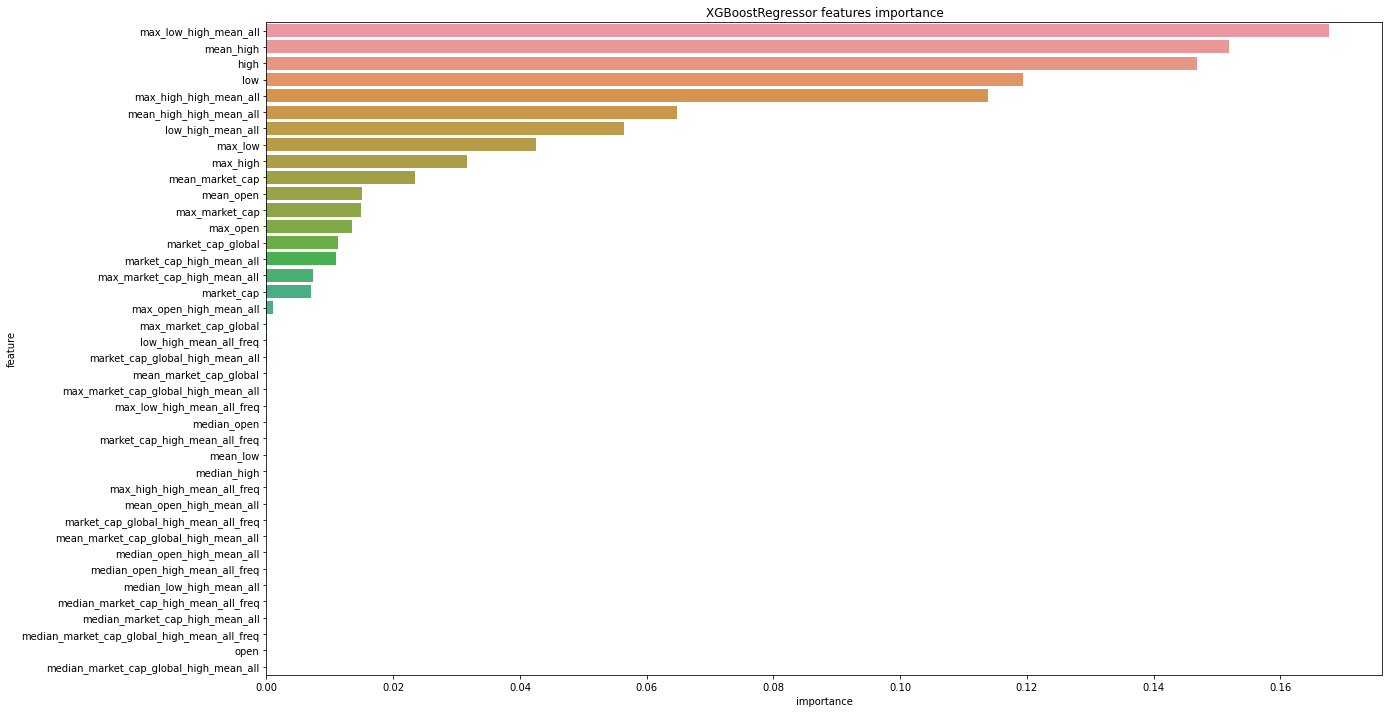

In [541]:
import seaborn as sn
import seaborn as sns
feature_importance_df = pd.DataFrame(xgb_other.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(40))
plt.title('XGBoostRegressor features importance');

###  **5. Conclusion**

Given that the XGBoostRegressor model performed better than all the other machine learning models. With a better RMSE score, The XGBoostRegressor model should be quite reliable at predicting the closing price of cryptocurrencies.

### Thanks for viewing this Notebook.